<a href="https://colab.research.google.com/github/Dicksonoloo1/SpaceInvader_AtariGame/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I ran this code using google colab as it has a lot of computational power and is free to use for every user. Google colab is similar to jupyter notebooks and offers many line to line interactive tools.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install tensorflow==1.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.3 MB 45 kB/s 
     |████████████████████████████████| 3.1 MB 52.7 MB/s 
     |████████████████████████████████| 488 kB 63.1 MB/s 
     |████████████████████████████████| 50 kB 8.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0+zzzcolab20220506162203
    Uninstalling tensorflow-2.8.0+zzzcolab20220506162203:
      Successfully uninstalled tensorflow-2.8.0+zzzcolab20220506162203
ERROR: pip's dependency resolver does not currently ta

In [4]:
import tensorflow as tf

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [5]:
tf.__version__

'1.14.0'

Importing all the required tools.

In [6]:
import numpy as np
import gym
from tensorflow.contrib.layers import flatten, conv2d, fully_connected
from collections import deque, Counter
import random
import datetime

Now we define a preprocessing function for our input game screens. We crop the image size convert the image into greyscale 1D tensor. We do this in order to make our algorithm faster. This removes all the unnecessary information which will apply less load on our GPU.

We are going to convert our 210 160 3 sized array into a 2-Dimensional 80 * 80 array. We also convert our images from RGB to normal grayscale pictures as we dont need have any use for the colors.

In [7]:
color = np.array([210, 164, 74]).mean()

#prepro (210, 160, 3) unit8 frame into 7040 (88x80) 1D float vector

def preprocess_observation(obs):


    # Crop and resize the image
    img = obs[25:201:2,  ::2]

    # Convert the image to greyscale
    img = img.mean(axis=2)

    # Improve image contrast
    img[img==color] = 0

    # Next we normalize the image from -1 to +1
    img = (img - 128) / 128 - 1

    return img.reshape(88,80)

In [8]:
!pip install gym[atari]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
! wget http://www.atarimania.com/roms/Roms.rar
! mkdir /content/ROM/
! unrar e /content/Roms.rar /content/ROM/
! python -m atari_py.import_roms /content/ROM/

--2022-05-24 18:02:42--  http://www.atarimania.com/roms/Roms.rar
Resolving www.atarimania.com (www.atarimania.com)... 195.154.81.199
Connecting to www.atarimania.com (www.atarimania.com)|195.154.81.199|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19583716 (19M) [application/x-rar-compressed]
Saving to: ‘Roms.rar’

Roms.rar            100%[===================>]  18.68M   806KB/s    in 24s     

2022-05-24 18:03:06 (782 KB/s) - ‘Roms.rar’ saved [19583716/19583716]


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Roms.rar

Extracting  /content/ROM/128 in 1 Game Select ROM (Unknown) ~.bin          0%  OK 
Extracting  /content/ROM/2 in 1 - Chess, Othello (Atari) (Prototype).bin       0%  OK 
Extracting  /content/ROM/2 Pak Special - Cavern Blaster, City War (1992) (HES) (773-867) (PAL).bin       0%  OK 
Extracting  /content/ROM/2 Pak Special - Challenge, Surfing (1990) (HES) (771-333) (PAL).b

6
['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']


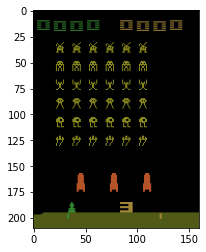

In [10]:
env = gym.make("SpaceInvaders-v0")
n_outputs = env.action_space.n
print(n_outputs)
print(env.env.get_action_meanings())

observation = env.reset()

import tensorflow as tf
import matplotlib.pyplot as plt

for i in range(22):

  if i > 20:
    plt.imshow(observation)
    plt.show()

  observation, _, _, _ = env.step(1) # we get to see the possible actions in the game

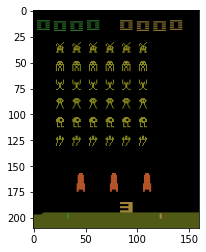

In [11]:
# Run this cell for more observations
for i in range(22):

  if i > 20:
    plt.imshow(observation)
    plt.show()

  observation, _, _, _ = env.step(1)

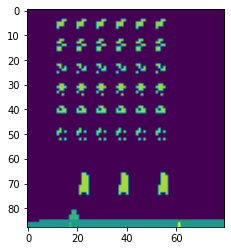

(210, 160, 3)
(88, 80)


In [12]:
# Take a look at the preprocessed inputs in greyscale. Weare pre-processing the images so that we can feed them into the netwrork and acquire the initial probability distribution of thr acrions or Q values
# Let's compare the original and preprocessed tensors

obs_preprocessed = preprocess_observation(observation).reshape(88,80)
plt.imshow(obs_preprocessed)
plt.show()
print(observation.shape)
print(obs_preprocessed.shape)

In [13]:
#Frame Stacking, used to supply another minibatch within a minibatch, in order to judge motion. orginally in deepmind paper
#Basically, as long as we always use stacks for all steps, and are consistent, there will not be any significant gaps in frequency

"""
We have all these frames, but what gets fed as input to the “Q-Network”? Paper used
 a sequence of four game frames stacked together, making the data dimension (4,84,84). 
 The idea is that the action agents choose depends on the prior sequence of game frames. 
 Imagine playing Breakout, for instance. Is the ball moving up or down? 
 If the ball is moving down, you better get the paddle in position to bounce it back up. 
 If the thatball is moving up, you can wait a little longer or try to move in the opposite direction as needed if you think the ball will eventually reach there.

Due to the way that Atari renders screens, every other frame may not aactually be rendered.
This is negatively affecting our performance, so instead, we take Deepmind's approach of element wise maxima
Create stack of 4, with 2 images combined via elementwise-maxima

"""


stack_size = 4 # We stack 4 composite frames in total

# Initialize deque with zero-images one array for each image. Deque is a special kind of queue that deletes last entry when new entry comes in
stacked_frames  =  deque([np.zeros((88,80), dtype=np.int) for i in range(stack_size)], maxlen=4)

def stack_frames(stacked_frames, state, is_new_episode):
    # Preprocess frame
    frame = preprocess_observation(state)
    
    if is_new_episode:
        # Clear our stacked_frames
        stacked_frames = deque([np.zeros((88,80), dtype=np.int) for i in range(stack_size)], maxlen=4)
        
        # Because we're in a new episode, copy the same frame 4x, apply elementwise maxima
        maxframe = np.maximum(frame,frame)
        stacked_frames.append(maxframe)
        stacked_frames.append(maxframe)
        stacked_frames.append(maxframe)
        stacked_frames.append(maxframe)
        
        
        
        # Stack the frames
        stacked_state = np.stack(stacked_frames, axis=2)
        
    else:
        #Since deque append adds t right, we can fetch rightmost element
        maxframe=np.maximum(stacked_frames[-1],frame)
        # Append frame to deque, automatically removes the oldest frame
        stacked_frames.append(maxframe)

        # Build the stacked state (first dimension specifies different frames)
        stacked_state = np.stack(stacked_frames, axis=2) 
    
    return stacked_state, stacked_frames

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Now we define a function called q_network for building our Deep Q network. We build Q network with three convolutional layers, followed by a flattening, and a fully connected layer.

In [14]:
tf.compat.v1.reset_default_graph()
#Reset is technically not necessary if variables done  in TF2
#https://github.com/ageron/tf2_course/issues/8

def q_network(X, name_scope):
    
    # Initialize layers
    initializer = tf.compat.v1.keras.initializers.VarianceScaling(scale=2.0)

    with tf.compat.v1.variable_scope(name_scope) as scope: 


        # initialize the convolutional layers
        layer_1 = conv2d(X, num_outputs=32, kernel_size=(8,8), stride=4, padding='SAME', weights_initializer=initializer) 
        tf.compat.v1.summary.histogram('layer_1',layer_1)
        
        layer_2 = conv2d(layer_1, num_outputs=64, kernel_size=(4,4), stride=2, padding='SAME', weights_initializer=initializer)
        tf.compat.v1.summary.histogram('layer_2',layer_2)
        
        layer_3 = conv2d(layer_2, num_outputs=64, kernel_size=(3,3), stride=1, padding='SAME', weights_initializer=initializer)
        tf.compat.v1.summary.histogram('layer_3',layer_3)
        
        # Flatten the result of layer_3 before feeding to the fully connected layer
        flat = flatten(layer_3)
        # Insert fully connected layer
        fc = fully_connected(flat, num_outputs=128, weights_initializer=initializer)
        tf.compat.v1.summary.histogram('fc',fc)
        #Add final output layer
        output = fully_connected(fc, num_outputs=n_outputs, activation_fn=None, weights_initializer=initializer)
        tf.compat.v1.summary.histogram('output',output)
        

        # Vars will store the parameters of the network such as weights
        vars = {v.name[len(scope.name):]: v for v in tf.compat.v1.get_collection(key=tf.compat.v1.GraphKeys.TRAINABLE_VARIABLES, scope=scope.name)} 
        #Return both variables and outputs together
        return vars, output

Next we define a function called epsilon_greedy for performing epsilon greedy policy.

In epsilon greedy policy we either select the best action with probability [1 - epsilon] or a random action with probability [epsilon].

We use decaying epsilon greedy policy where value of epsilon will be decaying over time as we don't want to explore forever. So over time our policy will be exploiting only good actions.

In [15]:
epsilon = 0.5
eps_min = 0.05
eps_max = 1.0
eps_decay_steps = 500000

#
def epsilon_greedy(action, step):
    p = np.random.random(1).squeeze() #1D entries returned using squeeze
    epsilon = max(eps_min, eps_max - (eps_max-eps_min) * step/eps_decay_steps) #Decaying policy with more steps
    if p< epsilon:
        return np.random.randint(n_outputs)
    else:
        return action

we initialize our buffer of length which holds the gameplay information. We store all the agent's experience i.e (state, action, rewards) in the experience replay buffer and we sample from this minibatch of experience for generating the y-values for the update function, and hence train the network.

In [16]:
buffer_len = 20000 #we get the input from  the stack and feed into the Q- network. We want the network to generate the info on the next 
                  #state(we arepreparing it for a next state and rewards/score
                  
#Buffer is made from a deque - double ended queue
exp_buffer = deque(maxlen=buffer_len)

Next, we define a function called sample_memories for sampling experiences from the memory according to batches. Batch size is the number of experience sampled from the memory.

In [17]:
def sample_memories(batch_size): #divide the buffer into several batches
    perm_batch = np.random.permutation(len(exp_buffer))[:batch_size]
    mem = np.array(exp_buffer)[perm_batch]
    return mem[:,0], mem[:,1], mem[:,2], mem[:,3], mem[:,4]

Now we define our network parameters,

In [18]:
num_episodes = 1000 #the number of times the game is being played-> computational power and training time. 100 has significant rewards
batch_size = 32 #the size of the batches, how the training data is being divided into sections. The size of the batches, how the training data is being divided into sections.Too small of a batch size, training time 
                #is too long, too large batch size means agent will not have enough info to obtain high results.

input_shape = (None, 88, 80, 1)
#Recall shape is img.reshape(88,80,1)
learning_rate = 0.001
#Modified for composite stacked frames
X_shape = (None, 88, 80, 4)
discount_factor = 0.97

global_step = 0
copy_steps = 100
steps_train = 4
start_steps = 2000

In [19]:
#defining placeholders for the input
logdir = 'logs'
tf.compat.v1.reset_default_graph()

# Now we define the placeholder for our input i.e game state
X = tf.compat.v1.placeholder(tf.float32, shape=X_shape)

# we define a boolean called in_training_model to toggle the training
in_training_mode = tf.compat.v1.placeholder(tf.bool)

Now let us build our primary and target Q network We have two networks to allow for training and data generation to occur concurrently. Note that the network returns the weights, as well as network outputs.

In [20]:
# we build our Q network, which takes the input X and generates Q values for all the actions in the state
mainQ, mainQ_outputs = q_network(X, 'mainQ')

# similarly we build our target Q network. 
targetQ, targetQ_outputs = q_network(X, 'targetQ')
# we are using a dual network (Q & target network) to allow generation of data using an existing epsilon policy while still optimising our parameters for the 
#next policy iteration. - allows agent to learn how to get better. 

Instructions for updating:
Use keras.layers.flatten instead.


In [21]:
# define the placeholder for our action values

X_action = tf.compat.v1.placeholder(tf.int32, shape=(None,))
Q_action = tf.reduce_sum(input_tensor=targetQ_outputs * tf.one_hot(X_action, n_outputs), axis=-1, keepdims=True)
#Copy the primary Q network parameters to the target Q network
copy_op = [tf.compat.v1.assign(main_name, targetQ[var_name]) for var_name, main_name in mainQ.items()]
copy_target_to_main = tf.group(*copy_op)

In [22]:
# define a placeholder for our output i.e action
y = tf.compat.v1.placeholder(tf.float32, shape=(None,1))

# now we calculate the loss which is the difference between actual value and predicted value
loss = tf.reduce_mean(input_tensor=tf.square(y - Q_action))

# we use adam optimizer for minimizing the loss
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

init = tf.compat.v1.global_variables_initializer()

loss_summary = tf.compat.v1.summary.scalar('LOSS', loss)
merge_summary = tf.compat.v1.summary.merge_all()
file_writer = tf.compat.v1.summary.FileWriter(logdir, tf.compat.v1.get_default_graph())

In [ ]:
#training the AI agent
with tf.compat.v1.Session() as sess:
    init.run()
    
    # for each episode
    history = []
    for i in range(num_episodes):
        done = False
        obs = env.reset()
        epoch = 0
        episodic_reward = 0
        actions_counter = Counter() 
        episodic_loss = []
        #First step, begin stacking frames
        
        obs,stacked_frames= stack_frames(stacked_frames,obs,True)

        # while the state is not the terminal state
        while not done:

           #Data generation using the untrained network
        
            

            # feed the game screen and get the Q values for each action,  FEED THE NETWORK BY CALLING THE OUTPUT LAYER
            
            actions = mainQ_outputs.eval(feed_dict={X:[obs], in_training_mode:False})

            # get the action
            action = np.argmax(actions, axis=-1)
            actions_counter[str(action)] += 1 

            # select the action using epsilon greedy policy
            action = epsilon_greedy(action, global_step)
            
            # now perform the action and move to the next state, next_obs, receive reward
            next_obs, reward, done, _ = env.step(action)

            #Begin stacking intra-episode code
            next_obs, stacked_frames = stack_frames(stacked_frames, next_obs, False)

            # Store this transistion as an experience in the replay buffer! Quite important
            exp_buffer.append([obs, action, next_obs, reward, done])
            
            # After certain steps, we train our Q network with samples from the experience replay buffer
            if global_step % steps_train == 0 and global_step > start_steps:
                #Our buffer should already contain everything preprocessed and stacked
                # sample experience, mem[:,0], mem[:,1], mem[:,2], mem[:,3], mem[:,4]
                o_obs, o_act, o_next_obs, o_rew, o_done = sample_memories(batch_size)

                # states
                o_obs = [x for x in o_obs]

                # next states
                o_next_obs = [x for x in o_next_obs]

                # next actions
                next_act = mainQ_outputs.eval(feed_dict={X:o_next_obs, in_training_mode:False})


                # discounted reward: these are our Y-values
                y_batch = o_rew + discount_factor * np.max(next_act, axis=-1) * (1-o_done) 

                # merge all summaries and write to the file
                mrg_summary = merge_summary.eval(feed_dict={X:o_obs, y:np.expand_dims(y_batch, axis=-1), X_action:o_act, in_training_mode:False})
                file_writer.add_summary(mrg_summary, global_step)

                # To calculate the loss, we run the previously defined functions mentioned while feeding inputs
                train_loss, _ = sess.run([loss, training_op], feed_dict={X:o_obs, y:np.expand_dims(y_batch, axis=-1), X_action:o_act, in_training_mode:True})
                episodic_loss.append(train_loss)
            
            # after some interval we copy our main Q network weights to target Q network
            if (global_step+1) % copy_steps == 0 and global_step > start_steps:
                copy_target_to_main.run()
                
            obs = next_obs
            epoch += 1
            global_step += 1
            episodic_reward += reward

        next_obs=np.zeros(obs.shape)
        exp_buffer.append([obs, action, next_obs, reward, done])
        obs= env.reset()
        obs,stacked_frames= stack_frames(stacked_frames,obs,True) 
        
        history.append(episodic_reward)
        print('Epochs per episode:', epoch, 'Episode Reward:', episodic_reward,"Episode number:", len(history))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Epochs per episode: 715 Episode Reward: 180.0 Episode number: 1
Epochs per episode: 846 Episode Reward: 335.0 Episode number: 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


Epochs per episode: 1495 Episode Reward: 685.0 Episode number: 3
Epochs per episode: 602 Episode Reward: 110.0 Episode number: 4
Epochs per episode: 541 Episode Reward: 105.0 Episode number: 5
Epochs per episode: 1042 Episode Reward: 295.0 Episode number: 6
Epochs per episode: 688 Episode Reward: 100.0 Episode number: 7
Epochs per episode: 685 Episode Reward: 110.0 Episode number: 8
Epochs per episode: 1531 Episode Reward: 320.0 Episode number: 9
Epochs per episode: 660 Episode Reward: 155.0 Episode number: 10
Epochs per episode: 1265 Episode Reward: 545.0 Episode number: 11
Epochs per episode: 520 Episode Reward: 55.0 Episode number: 12
Epochs per episode: 733 Episode Reward: 110.0 Episode number: 13
Epochs per episode: 399 Episode Reward: 5.0 Episode number: 14
Epochs per episode: 647 Episode Reward: 155.0 Episode number: 15
Epochs per episode: 801 Episode Reward: 135.0 Episode number: 16
Epochs per episode: 632 Episode Reward: 105.0 Episode number: 17
Epochs per episode: 422 Episode

Let's plot our reward distribution across the incremental episodes

In [ ]:
#graph for rewards distr against incremental episodes
# checks the rewards as episodes increase
plt.plot(history)
plt.show()

Finally, let's visualize our agent's performance, and play a game within the gym environment itself.

In [ ]:
#Visualization code for running within Colab
#Within Colab, we cannot run a Python console hence we need to render the entire episode into a video which can be displayed in a virtual 
#dispaly of Ipython(interactive python) lib

# Install dependencies first for graphics visualization within Colaboratory

#remove " > /dev/null 2>&1" to see what is going on under the hood
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1

In [ ]:
#To Evaluate model on OpenAI gym, we will record a video via Ipython display



from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only

import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay


from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [ ]:
#Evaluate model on openAi GYM


environment = wrap_env(gym.make('SpaceInvaders-v0'))
done = False
observation = environment.reset()
new_observation = observation

prev_input = None

with tf.compat.v1.Session() as sess:
    init.run()
    observation, stacked_frames = stack_frames(stacked_frames, observation, True)
    while True:
       
    
        #set input to network to be difference image
  
        
        #print(observation.shape)
        
        

        # feed the game screen and get the Q values for each action
        actions = mainQ_outputs.eval(feed_dict={X:[observation], in_training_mode:False})

        # get the action
        action = np.argmax(actions, axis=-1)
        actions_counter[str(action)] += 1 

        # select the action using epsilon greedy policy
        action = epsilon_greedy(action, global_step)
        environment.render()
        new_observation, stacked_frames = stack_frames(stacked_frames, new_observation, False)
        
        observation = new_observation        
        # now perform the action and move to the next state, next_obs, receive reward
        new_observation, reward, done, _ = environment.step(action)
        
        if done: 
          #observation = env.reset()
          break
      
    environment.close()
    show_video()